<a href="https://colab.research.google.com/github/mashiroudon/SCCP5/blob/main/MY_HAPP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [ ]:
X=iris.data
y=iris.target

num_classes=len(iris.target_names)
batch_size=5
epochs=20
seed=7

In [ ]:
#MLPの構築

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import rmsprop_v2
import tensorflow as tf

model=tf.keras.Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#from keras.utils import plot_model
#tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
import numpy as np
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, random_state=seed, shuffle=True)
predicted=np.empty(len(y))
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
  predicted[test_index]=np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
24/24 [==============================] - 3s 9ms/step - loss: 1.2292 - accuracy: 0.3250 - val_loss: 1.1034 - val_accuracy: 0.3667
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 1.0706 - accuracy: 0.3833 - val_loss: 1.0491 - val_accuracy: 0.4667
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.9673 - accuracy: 0.4917 - val_loss: 0.9283 - val_accuracy: 0.5667
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.8574 - accuracy: 0.6917 - val_loss: 0.8637 - val_accuracy: 0.8000
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.8000 - val_loss: 0.7830 - val_accuracy: 0.6000
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.7500 - val_loss: 0.7118 - val_accuracy: 0.9667
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.9000 - val_loss: 0.7096 - val_accuracy: 0.6000
Epoch 8/20
24/24 [==

In [ ]:
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y, predicted))

Test accuracy: 0.9666666666666667


In [ ]:
#CNN

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("X_train[0]:")
print(X_train[0])

11501568/11490434 [==============================] - 3s 0us/step
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
X_train[0]:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 

In [ ]:
#データの正規化

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

from keras import backend as K
img_rows, img_cols = X_train.shape[1:3]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
!pip install keras-optimizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras-optimizers (from versions: none)
ERROR: No matching distribution found for keras-optimizers


In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

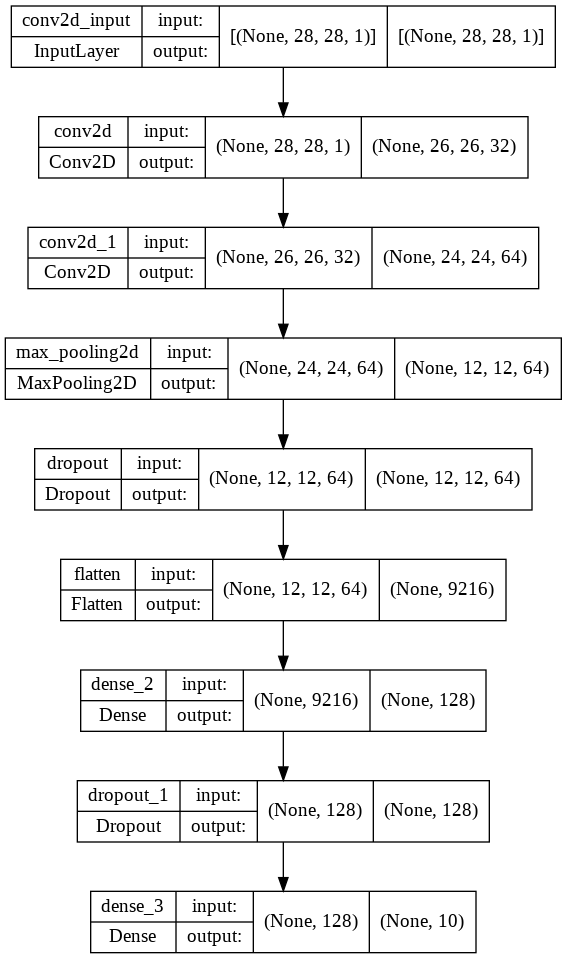

In [ ]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 14s 10ms/step - loss: 2.2796 - accuracy: 0.1291 - val_loss: 2.2433 - val_accuracy: 0.2922
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 2.2209 - accuracy: 0.2346 - val_loss: 2.1723 - val_accuracy: 0.4592
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 2.1466 - accuracy: 0.3390 - val_loss: 2.0778 - val_accuracy: 0.5754
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 2.0469 - accuracy: 0.4331 - val_loss: 1.9488 - val_accuracy: 0.6714
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 1.9159 - accuracy: 0.5071 - val_loss: 1.7810 - val_accuracy: 0.7343
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 1.7552 - accuracy: 0.5622 - val_loss: 1.5817 - val_accuracy: 0.7686
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 1.5801 - accuracy: 0.6063 - val_loss: 1.3726 - val_accuracy: 0.7901
Epoc

In [ ]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28446993231773376
Test accuracy: 0.9182000160217285


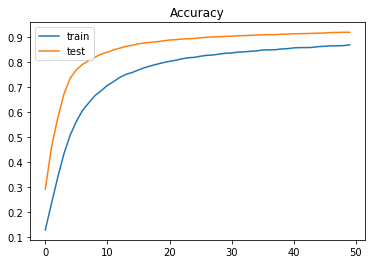

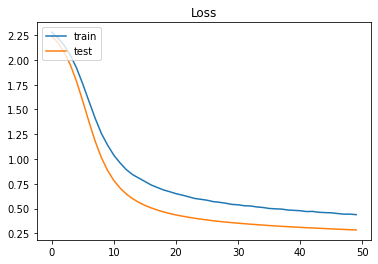

In [ ]:
import matplotlib.pyplot as plt

#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
!wget  "https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP" -O project0_data.zip
!unzip project0_data.zip

--2022-09-12 00:45:52--  https://drive.google.com/uc?export=download&id=1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.101, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/am80e88hqlnqpjtirfk0nj314q08r8fk/1662943500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download&uuid=d74a0bd8-5fdf-41bc-8d81-e76c4d211bac [following]
--2022-09-12 00:45:53--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/am80e88hqlnqpjtirfk0nj314q08r8fk/1662943500000/12360162376384578551/*/1e7SIWWdQ-wee8v0XUK-qJFEWMTujSaGP?e=download&uuid=d74a0bd8-5fdf-41bc-8d81-e76c4d211bac
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [ ]:
#RNN

import numpy as np
import os
import glob
target_acts=['act01', 'act02', 'act03']
X_train=[]
y_train=[]
for i, target_act in enumerate(target_acts):
  for fname in sorted(glob.glob(os.path.join(target_act, '*.txt'))):
    X_train.append(np.loadtxt(fname))
    y_train.append(i)
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=[]
for fname in sorted(glob.glob(os.path.join('test', '*.txt'))):
  X_test.append(np.loadtxt(fname))
X_test=np.array(X_test)
y_test=np.array([1, 2, 2, 2, 0, 2, 0, 1, 0, 1])

In [ ]:
X_train.shape

(21, 101, 3)

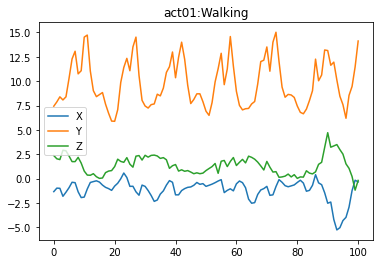

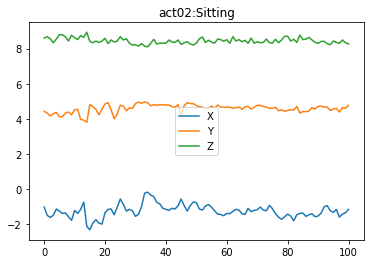

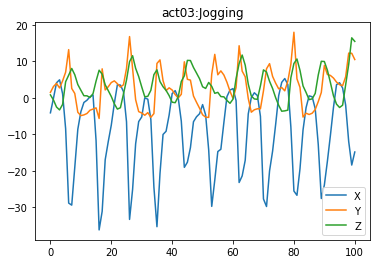

In [ ]:
import matplotlib.pyplot as plt
act_names=['Walking', 'Sitting', 'Jogging']
for i in range(3):
  plt.plot(X_train[y_train==i][0])
  plt.title(target_acts[i]+':'+act_names[i])
  plt.legend(['X', 'Y', 'Z'])
  plt.show()

In [ ]:
timesteps, features = X_train.shape[-2:]
num_classes = len(target_acts)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 101
Features: 3
# of Classes: 3


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

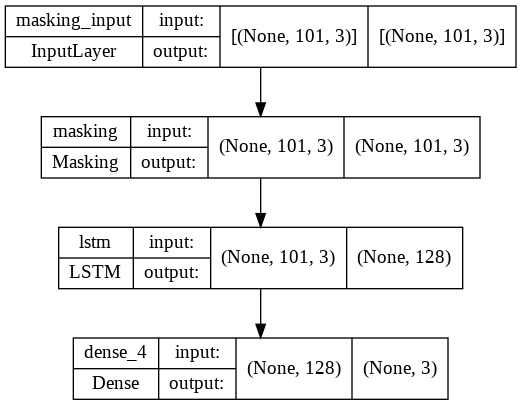

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
batch_size=7
epochs=10

hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/10
3/3 [==============================] - 3s 363ms/step - loss: 0.8591 - accuracy: 0.6667 - val_loss: 0.3535 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 186ms/step - loss: 0.2552 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 186ms/step - loss: 0.1075 - accuracy: 1.0000 - val_loss: 0.0735 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 187ms/step - loss: 0.0578 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 190ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 184ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 182ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.006152404937893152
Test accuracy: 1.0


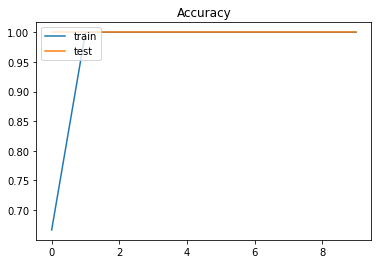

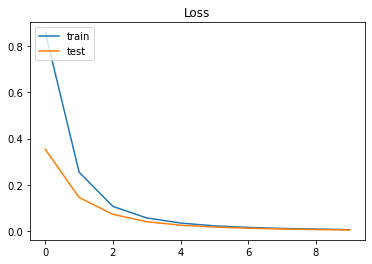

In [ ]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#CNN

In [ ]:
!wget https://www.u-aizu.ac.jp/labs/is-pp/pplab/swr/sign_word_dataset.zip
!unzip sign_word_dataset.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: sign word dataset/Sit/464.jpg  
  inflating: sign word dataset/Sit/465.jpg  
  inflating: sign word dataset/Sit/466.jpg  
  inflating: sign word dataset/Sit/467.jpg  
  inflating: sign word dataset/Sit/468.jpg  
  inflating: sign word dataset/Sit/469.jpg  
  inflating: sign word dataset/Sit/47.jpg  
  inflating: sign word dataset/Sit/470.jpg  
  inflating: sign word dataset/Sit/471.jpg  
  inflating: sign word dataset/Sit/472.jpg  
  inflating: sign word dataset/Sit/473.jpg  
  inflating: sign word dataset/Sit/474.jpg  
  inflating: sign word dataset/Sit/475.jpg  
  inflating: sign word dataset/Sit/476.jpg  
  inflating: sign word dataset/Sit/477.jpg  
  inflating: sign word dataset/Sit/478.jpg  
  inflating: sign word dataset/Sit/479.jpg  
  inflating: sign word dataset/Sit/48.jpg  
  inflating: sign word dataset/Sit/480.jpg  
  inflating: sign word dataset/Sit/481.jpg  
  inflating: sign word dataset/Sit/482.jpg  
  inflating: sign word da

In [ ]:
import numpy as np
from PIL import Image
import os
import glob

dname='sign word dataset'
target_names=[f for f in os.listdir(path=dname) if os.path.isdir(os.path.join(dname, f))]

X=[]
y=[]

img_size=(64, 64)

for i, target_name in enumerate(target_names):
  for fname in sorted(glob.glob(os.path.join(dname, target_name, '*.jpg')), key=lambda a:int(os.path.basename(a).split('.')[0])):
    X.append(np.array(Image.open(fname).resize(img_size), dtype='float32'))
    y.append(i)
X=np.array(X)
y=np.array(y)

In [ ]:
print('X shape:', X.shape)
print(X.shape[0], 'samples')
print('ジェスチャーの種類:')
print(target_names)

X shape: (18000, 64, 64, 3)
18000 samples
ジェスチャーの種類:
['Work', 'Wash', 'Home', 'Help', 'Yes', 'Correct', 'Close', 'Call', 'Tall', 'Single', 'Sit', 'Fine', 'Please', 'Love', 'No', 'Like', 'Cold', 'Ok', 'ILoveYou', 'You']


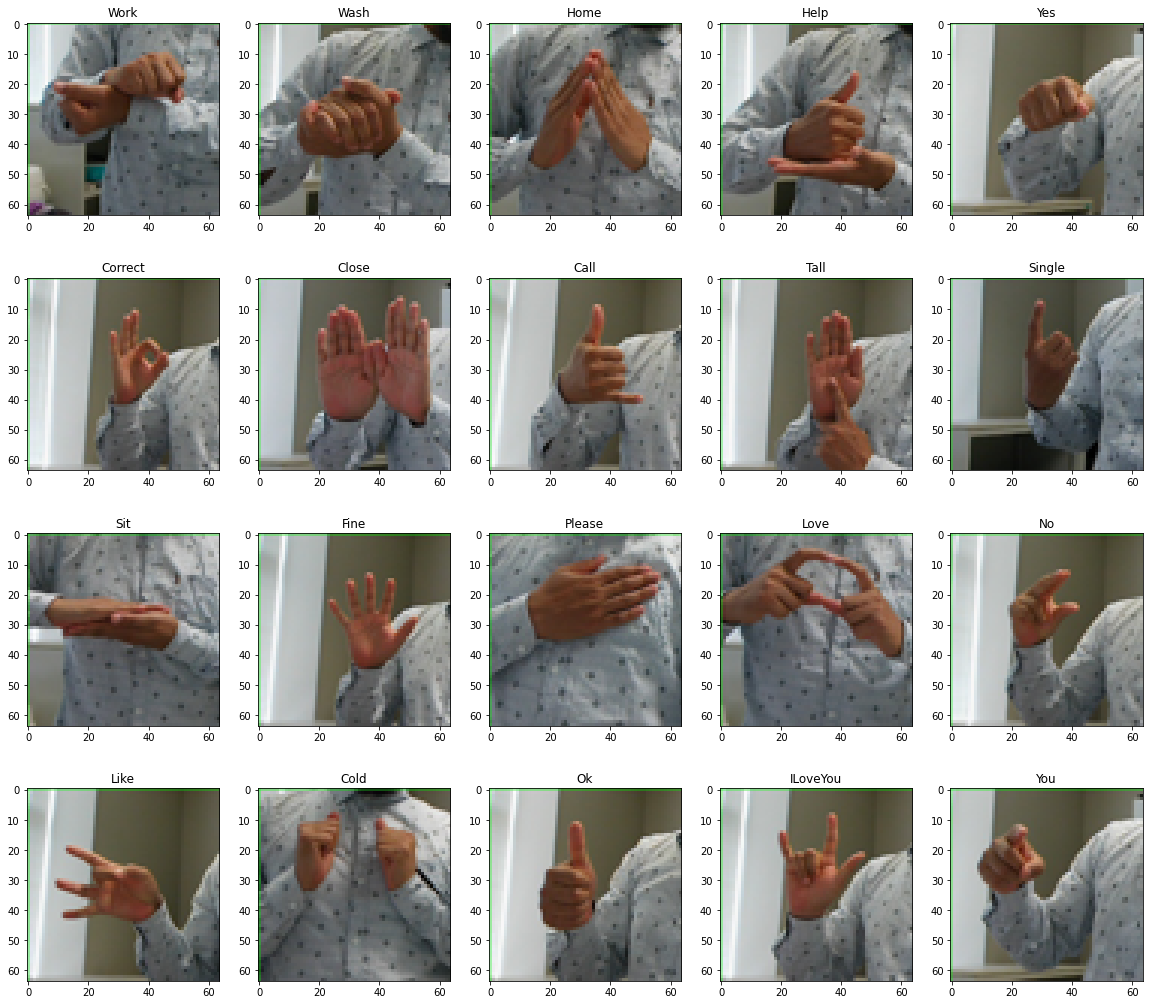

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 18))
for i in range(len(target_names)):
  ax=fig.add_subplot(4, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].astype(int))
  ax.set_title(target_names[i])

In [ ]:
X/=255

from keras import backend as K
img_rows, img_cols, img_channels=X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
batch_size=128
num_classes=len(target_names)
epochs=100

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

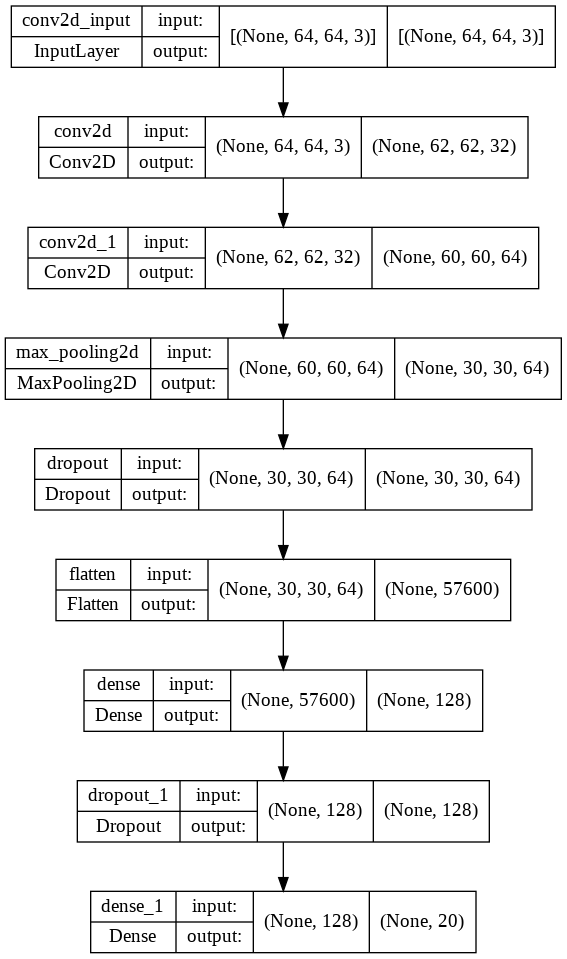

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
hist=model.fit(X_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(X_test, y_test))

Epoch 1/100
106/106 [==============================] - 16s 46ms/step - loss: 3.0002 - accuracy: 0.0679 - val_loss: 2.9702 - val_accuracy: 0.1227
Epoch 2/100
106/106 [==============================] - 4s 40ms/step - loss: 2.9685 - accuracy: 0.0785 - val_loss: 2.9375 - val_accuracy: 0.1582
Epoch 3/100
106/106 [==============================] - 4s 40ms/step - loss: 2.9421 - accuracy: 0.1006 - val_loss: 2.9066 - val_accuracy: 0.2282
Epoch 4/100
106/106 [==============================] - 4s 40ms/step - loss: 2.9130 - accuracy: 0.1228 - val_loss: 2.8714 - val_accuracy: 0.2478
Epoch 5/100
106/106 [==============================] - 4s 40ms/step - loss: 2.8820 - accuracy: 0.1429 - val_loss: 2.8317 - val_accuracy: 0.2524
Epoch 6/100
106/106 [==============================] - 4s 40ms/step - loss: 2.8441 - accuracy: 0.1621 - val_loss: 2.7894 - val_accuracy: 0.2813
Epoch 7/100
106/106 [==============================] - 4s 40ms/step - loss: 2.8077 - accuracy: 0.1799 - val_loss: 2.7449 - val_accuracy

In [ ]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2110651433467865
Test accuracy: 0.9568889141082764


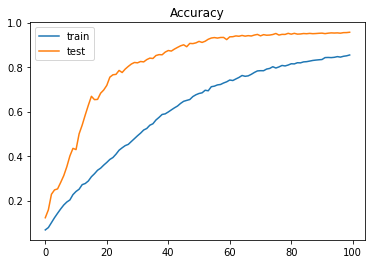

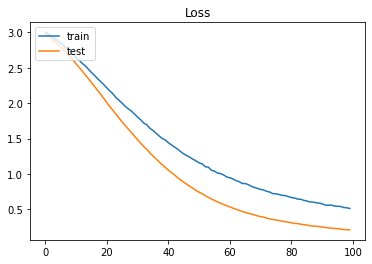

In [ ]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#RNN

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc" -O HandDB_SOC_Number.zip
!unzip HandDB_SOC_Number.zip

--2022-09-12 04:51:55--  https://drive.google.com/uc?export=download&id=1annxrMLs6srAaImNNi8or9DFJfsguXSc
Resolving drive.google.com (drive.google.com)... 64.233.182.102, 64.233.182.139, 64.233.182.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.182.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6qovvj8uvjm1fn77ppov1a9gu4vv33ma/1662958275000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download&uuid=38300526-770c-488d-9f37-c782b4fb31a7 [following]
--2022-09-12 04:52:00--  https://doc-10-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6qovvj8uvjm1fn77ppov1a9gu4vv33ma/1662958275000/12360162376384578551/*/1annxrMLs6srAaImNNi8or9DFJfsguXSc?e=download&uuid=38300526-770c-488d-9f37-c782b4fb31a7
Resolving doc-10-3c-docs.googleusercontent.com (doc-10-3c-docs.googleusercontent.com)... 142.250.148.132, 2607

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

import csv
import os
import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=d13462398da955f5552024e450e73539f3d79aa3d6f1b3e4e217370611050c35
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
target_list=list(range(65296, 65306))
target_names=[chr(code) for code in target_list]
X=[]
y=[]
X_length=[]

for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length=max(X_length)
max_length

145

In [ ]:
def trp(l, n, padding=-1):
  return l[:n]+[[padding]*len(l[0])]*(n-len(l))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=max_length, padding='post', value=-1)
y = np.array(y)
X_length = np.array(X_length)
mask = ~(X_length==1)
X = X[mask]
y = y[mask]
X_length = X_length[mask]

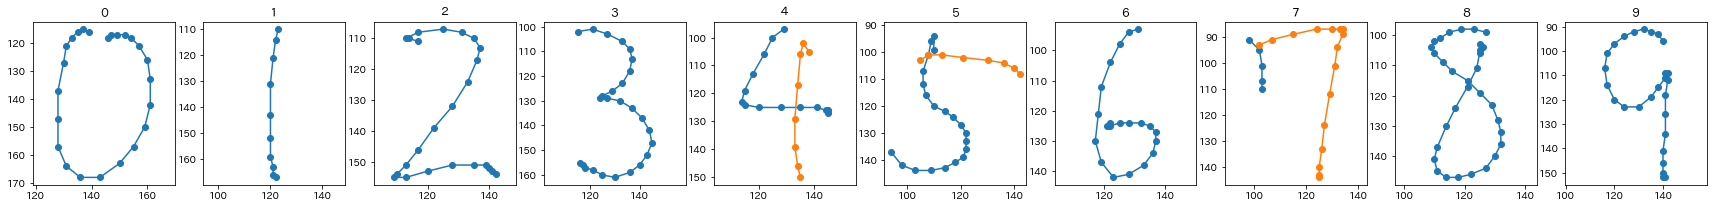

In [ ]:
fig = plt.figure(figsize=(30, 3))
for i in range(max(y)+1):
  ax = fig.add_subplot(1, 10, i+1)
  data = X[y.tolist().index(i)]
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
  ax.set_aspect('equal', 'datalim')
  ax.invert_yaxis()
  ax.set_title(chr(target_list[i]))
plt.show()

(array([ 44.,  40.,  76., 242., 199., 197., 118.,  72.,  68.,  25.,  32.,
         21.,   6.,   8.,   4.,   2.,   4.,   2.,   5.,   2.,   2.,   2.,
          2.,   1.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([  7. ,  11.6,  16.2,  20.8,  25.4,  30. ,  34.6,  39.2,  43.8,
         48.4,  53. ,  57.6,  62.2,  66.8,  71.4,  76. ,  80.6,  85.2,
         89.8,  94.4,  99. , 103.6, 108.2, 112.8, 117.4, 122. , 126.6,
        131.2, 135.8, 140.4, 145. ]),
 <a list of 30 Patch objects>)

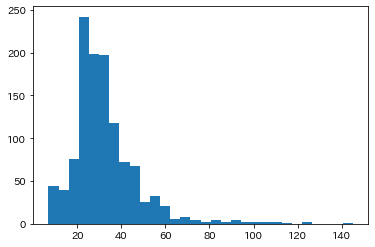

In [ ]:
plt.hist(X_length, bins=30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, y, X_length, test_size=0.20, random_state=42)

timesteps, features = X_train.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

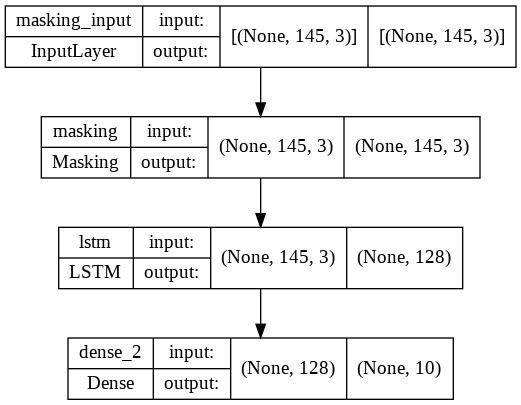

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
batch_size=128
epochs=200

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 12s 1s/step - loss: 2.1771 - accuracy: 0.2476 - val_loss: 1.8802 - val_accuracy: 0.3898
Epoch 2/200
8/8 [==============================] - 5s 572ms/step - loss: 1.8141 - accuracy: 0.4070 - val_loss: 1.6909 - val_accuracy: 0.4534
Epoch 3/200
8/8 [==============================] - 5s 576ms/step - loss: 1.6814 - accuracy: 0.4474 - val_loss: 1.6364 - val_accuracy: 0.4576
Epoch 4/200
8/8 [==============================] - 5s 614ms/step - loss: 1.5997 - accuracy: 0.4952 - val_loss: 1.5567 - val_accuracy: 0.4873
Epoch 5/200
8/8 [==============================] - 5s 595ms/step - loss: 1.5323 - accuracy: 0.5143 - val_loss: 1.5218 - val_accuracy: 0.4958
Epoch 6/200
8/8 [==============================] - 5s 577ms/step - loss: 1.4800 - accuracy: 0.5324 - val_loss: 1.4687 - val_accuracy: 0.4873
Epoch 7/200
8/8 [==============================] - 5s 573ms/step - loss: 1.4218 - accuracy: 0.5420 - val_loss: 1.4001 - val_accuracy: 0.5127
Epoch 8/200
8/8

In [ ]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23805207014083862
Test accuracy: 0.9406779408454895


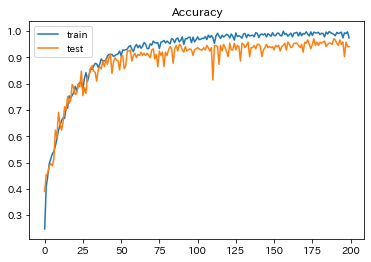

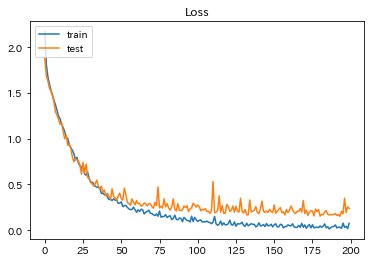

In [ ]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#CNN+RNN

In [ ]:
target_list = list(range(65296, 65306))
target_names = [chr(code) for code in target_list]
X = []
y = []
X_length = []
for i, target_dir in enumerate(target_list):
  for path in sorted(glob.glob(os.path.join("HandDB_SOC_Number", str(target_dir), "*.soc"))):
    data = []
    with open(path) as f:
      reader = csv.reader(f)
      header = next(reader)
      for row in reader:
        data.append([int(d) for d in row])
    X.append(data)
    y.append(i)
    X_length.append(len(data))

In [ ]:
max_length = max(X_length)
max_length

145

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=max_length, value=-1, padding="post")
y = np.array(y)
X_length = np.array(X_length)
timesteps, features = X.shape[-2:]
num_classes = len(target_list)
print("Timesteps:", timesteps)
print("Features:", features)
print("# of Classes:", num_classes)

Timesteps: 145
Features: 3
# of Classes: 10


In [ ]:
import io
import cv2

In [ ]:
def get_img_from_fig(fig, dpi=64):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = 255 - img
    return img

In [ ]:
def get_img_from_data(data, dpi=64, linewidth=3):
  fig = plt.figure(figsize=(1, 1))
  n_stroke = data[:, 0].max()
  for i_stroke in range(n_stroke+1):
    plt.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, color="black", linewidth=linewidth)
  plt.gca().set_aspect('equal', 'datalim')
  plt.gca().invert_yaxis()
  plt.axis('off')
  img = get_img_from_fig(fig, dpi)
  plt.close()
  return img

In [ ]:
X_images = np.array([get_img_from_data(a, dpi=32, linewidth=3) for a in X], dtype=np.float64)
img_rows, img_cols = X_images.shape[1:]
img_channels = 1
print("row:", img_rows)
print("col:", img_cols)

row: 32
col: 32


Text(0.5, 0.98, 'label: 9')

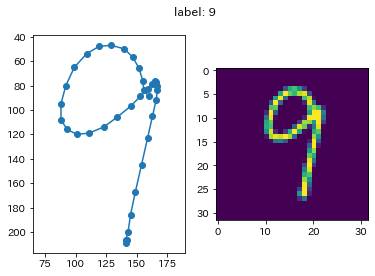

In [ ]:
index = 1100
fig, (axL, axR) = plt.subplots(ncols=2)
data = X[index]
n_stroke = data[:, 0].max()
for i_stroke in range(n_stroke+1):
  axL.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
axL.set_aspect('equal', 'datalim')
axL.invert_yaxis()
axR.imshow(X_images[index].reshape(img_rows, img_cols))
fig.suptitle(f"label: {y[index]}")

In [ ]:
X_images/=255

from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_images = X_images.reshape(X_images.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_images = X_images.reshape(X_images.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_img_train, X_img_test, y_train, y_test, X_length_train, X_length_test = train_test_split(X, X_images, y, X_length, test_size=0.20, random_state=42)

In [ ]:
#CNNモデル

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
batch_size=128
epochs=12

model.fit(X_img_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_img_test, y_test))

Epoch 1/12
8/8 [==============================] - 1s 51ms/step - loss: 1.7672 - accuracy: 0.5000 - val_loss: 0.7244 - val_accuracy: 0.8390
Epoch 2/12
8/8 [==============================] - 0s 13ms/step - loss: 0.6286 - accuracy: 0.7934 - val_loss: 0.3496 - val_accuracy: 0.8898
Epoch 3/12
8/8 [==============================] - 0s 13ms/step - loss: 0.3528 - accuracy: 0.8919 - val_loss: 0.2635 - val_accuracy: 0.9237
Epoch 4/12
8/8 [==============================] - 0s 13ms/step - loss: 0.2357 - accuracy: 0.9343 - val_loss: 0.2125 - val_accuracy: 0.9280
Epoch 5/12
8/8 [==============================] - 0s 14ms/step - loss: 0.1873 - accuracy: 0.9396 - val_loss: 0.1978 - val_accuracy: 0.9534
Epoch 6/12
8/8 [==============================] - 0s 13ms/step - loss: 0.1705 - accuracy: 0.9513 - val_loss: 0.1903 - val_accuracy: 0.9492
Epoch 7/12
8/8 [==============================] - 0s 13ms/step - loss: 0.1182 - accuracy: 0.9513 - val_loss: 0.1854 - val_accuracy: 0.9449
Epoch 8/12
8/8 [===========

In [ ]:
#RNNモデル

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional

model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
batch_size=128
epochs=200

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
8/8 [==============================] - 7s 624ms/step - loss: 2.2507 - accuracy: 0.1758 - val_loss: 2.0323 - val_accuracy: 0.3644
Epoch 2/200
8/8 [==============================] - 5s 593ms/step - loss: 1.9438 - accuracy: 0.3814 - val_loss: 1.8750 - val_accuracy: 0.3644
Epoch 3/200
8/8 [==============================] - 5s 579ms/step - loss: 1.7808 - accuracy: 0.4333 - val_loss: 1.7581 - val_accuracy: 0.3305
Epoch 4/200
8/8 [==============================] - 5s 579ms/step - loss: 1.6508 - accuracy: 0.4523 - val_loss: 1.6583 - val_accuracy: 0.3983
Epoch 5/200
8/8 [==============================] - 5s 567ms/step - loss: 1.5527 - accuracy: 0.5148 - val_loss: 1.5614 - val_accuracy: 0.4958
Epoch 6/200
8/8 [==============================] - 5s 579ms/step - loss: 1.4655 - accuracy: 0.5614 - val_loss: 1.5143 - val_accuracy: 0.4703
Epoch 7/200
8/8 [==============================] - 4s 558ms/step - loss: 1.4091 - accuracy: 0.5636 - val_loss: 1.4422 - val_accuracy: 0.4703
Epoch 8/200
8

In [ ]:
#CNN+RNNモデル

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Embedding, Masking
from keras.layers import concatenate
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))

lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Masking(mask_value=-1., input_shape=(timesteps, features)))
lstm_model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))

merged = tf.keras.layers.concatenate([cnn_model.output, lstm_model.output])
merged_model = tf.keras.layers.Dropout(0.5)(merged)
merged_model = tf.keras.layers.Dense(num_classes, activation="softmax")(merged_model)

model = tf.keras.Model([cnn_model.input, lstm_model.input], merged_model)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

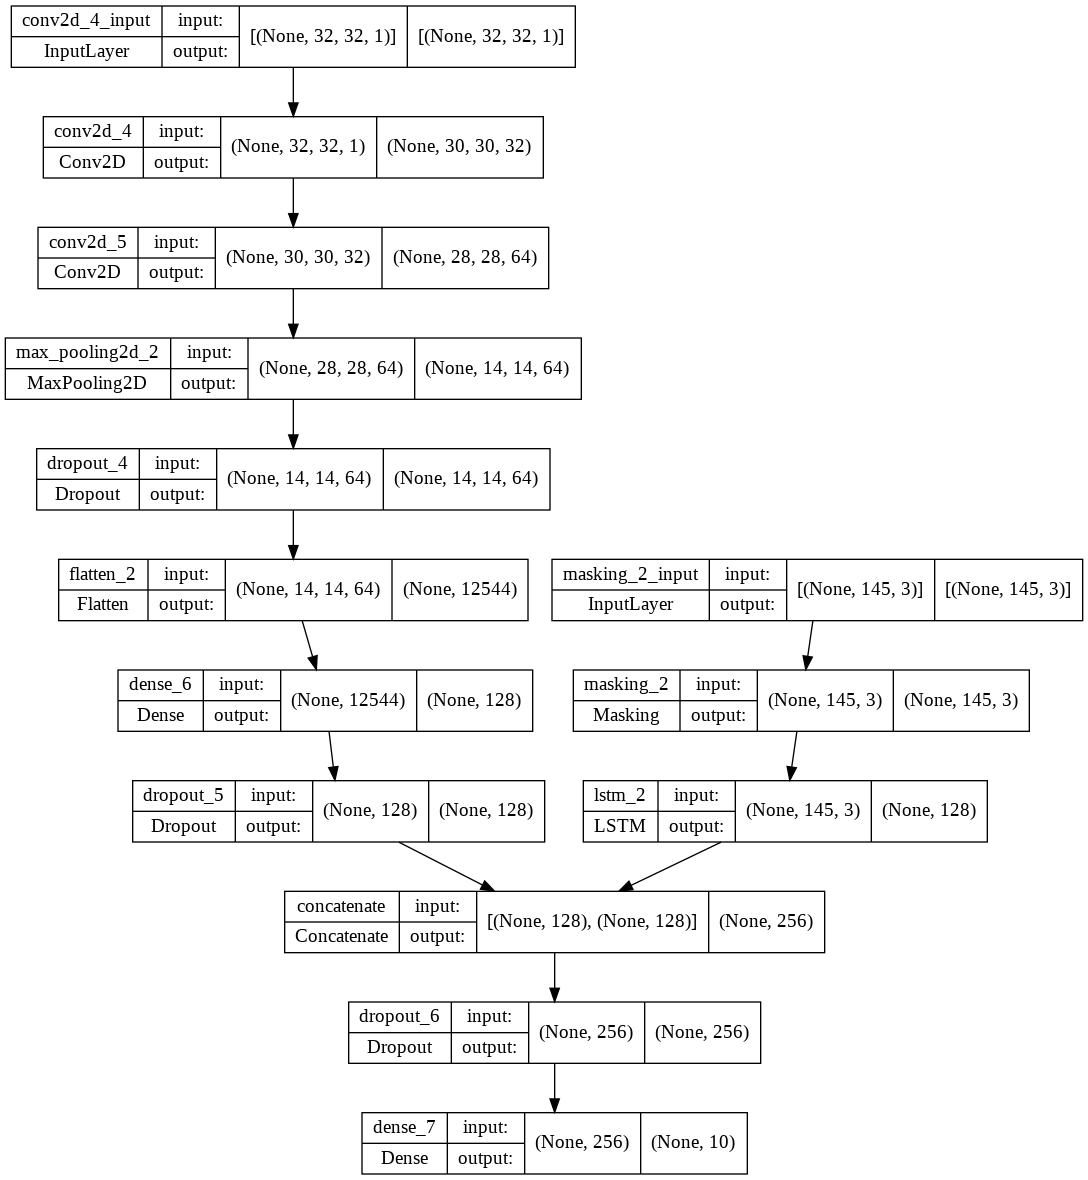

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
batch_size=128
epochs=25

hist = model.fit([X_img_train, X_train], y_train, batch_size=batch_size, epochs=epochs, validation_data=([X_img_test, X_test], y_test))

Epoch 1/25
8/8 [==============================] - 8s 661ms/step - loss: 2.0309 - accuracy: 0.2553 - val_loss: 1.0544 - val_accuracy: 0.7881
Epoch 2/25
8/8 [==============================] - 5s 574ms/step - loss: 1.0671 - accuracy: 0.6345 - val_loss: 0.4390 - val_accuracy: 0.9025
Epoch 3/25
8/8 [==============================] - 5s 577ms/step - loss: 0.6801 - accuracy: 0.7924 - val_loss: 0.2939 - val_accuracy: 0.9237
Epoch 4/25
8/8 [==============================] - 5s 571ms/step - loss: 0.5346 - accuracy: 0.8231 - val_loss: 0.2396 - val_accuracy: 0.9364
Epoch 5/25
8/8 [==============================] - 5s 578ms/step - loss: 0.4234 - accuracy: 0.8591 - val_loss: 0.2295 - val_accuracy: 0.9280
Epoch 6/25
8/8 [==============================] - 5s 585ms/step - loss: 0.3596 - accuracy: 0.8856 - val_loss: 0.1986 - val_accuracy: 0.9407
Epoch 7/25
8/8 [==============================] - 5s 595ms/step - loss: 0.3020 - accuracy: 0.9078 - val_loss: 0.1668 - val_accuracy: 0.9492
Epoch 8/25
8/8 [====

In [ ]:
score = model.evaluate([X_img_test, X_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08738867193460464
Test accuracy: 0.9830508232116699


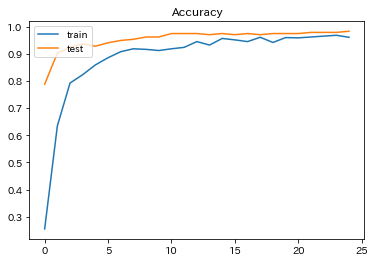

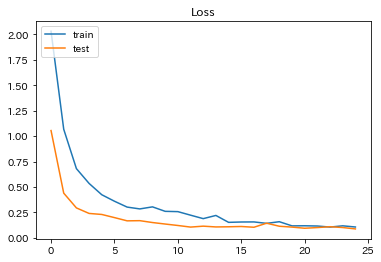

In [ ]:
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#FFT+CNN

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD" -O SVC2004_SOC.zip
!unzip SVC2004_SOC.zip

--2022-09-12 06:25:18--  https://drive.google.com/uc?export=download&id=1k9E23KYCMELX38WCkGPtwwWb1s855xpD
Resolving drive.google.com (drive.google.com)... 74.125.202.102, 74.125.202.101, 74.125.202.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8earfb1tu9t79dl15of2378p45buge3l/1662963900000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download&uuid=98193cf4-f2ba-4261-8b34-4533d8726e3c [following]
--2022-09-12 06:25:26--  https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8earfb1tu9t79dl15of2378p45buge3l/1662963900000/12360162376384578551/*/1k9E23KYCMELX38WCkGPtwwWb1s855xpD?e=download&uuid=98193cf4-f2ba-4261-8b34-4533d8726e3c
Resolving doc-0s-3c-docs.googleusercontent.com (doc-0s-3c-docs.googleusercontent.com)... 142.250.136.132, 2607

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split 
from keras.preprocessing.sequence import pad_sequences

In [ ]:
files = glob.glob(os.path.join("SVC2004_SOC", "Task1", "*.soc"))
files = sorted(files, key = lambda x: [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(x)).groups()])
X = []
user = []
genuine = []
X_length = []
for file_path in files:
  try:
    data = pd.read_csv(file_path)
    data = data.loc[data["stroke_num"]>=0]
    data.loc[:, "time"] -= data.iloc[0].loc["time"]
    u_g = [int(i) for i in re.fullmatch('^U(\d+)S(\d+).soc$', os.path.basename(file_path)).groups()]
    X.append(data.loc[:, ["stroke_num", "x", "y", "time"]].values)
    user.append(u_g[0])
    genuine.append(1 if u_g[1] < 21 else 0)
    X_length.append(len(data))
  except Exception as e:
    print(e, file_path)
    print(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [ ]:
max_length=max(X_length)
num_user=max(user)

In [ ]:
user=np.array(user)
genuine=np.array(genuine)
X_length=np.array(X_length)

In [ ]:
def get_freq(data):
  N = len(data)
  freq = np.fft.fft(data)
  return np.abs(freq)[1:int(N/2+0.5)]

In [ ]:
def get_velocity(data):
  num_index = max(data[:, 0])
  x_vel = []
  y_vel = []
  xy_vel = []
  t_diff = []
  for i in range(num_index+1):
    stroke_data = data[data[:, 0]==i]
    if len(stroke_data) == 1:
      x_vel.append(0)
      y_vel.append(0)
      xy_vel.append(0)
      t_diff.append(0.01)
    else:
      time_diff = np.ediff1d(stroke_data[:, 3]*0.001)
      time_diff = np.append([time_diff.mean()], time_diff)
      stroke_data = stroke_data[time_diff!=0]
      time_diff = time_diff[time_diff!=0]
      x_diff = np.ediff1d(stroke_data[:, 1], to_begin=0) / time_diff
      y_diff = np.ediff1d(stroke_data[:, 2], to_begin=0) / time_diff
      diff = np.array([np.linalg.norm(stroke_data[i] - stroke_data[i-1]) for i in range(1, len(stroke_data))])
      diff = np.append([0], diff) / time_diff
      x_vel.extend(x_diff)
      y_vel.extend(y_diff)
      xy_vel.extend(diff)
      t_diff.extend(time_diff)
  return np.array(x_vel), np.array(y_vel), np.array(xy_vel), np.array(t_diff)

In [ ]:
def get_velocity_sft(data, n_window=50):
  x_vel, y_vel, xy_vel, t_diff = get_velocity(data)
  dt = np.mean(t_diff)
  d_len = len(t_diff)
  amps = []
  for i in range(n_window, d_len):
    vel_tmp = xy_vel[i-n_window:i]
    amp = np.array([get_freq(x_vel[i-n_window:i]), get_freq(y_vel[i-n_window:i]), get_freq(xy_vel[i-n_window:i])]).T
    amps.append(amp)
  freq = np.fft.fftfreq(n_window, dt)[1:int(n_window/2+0.5)]
  return np.array(amps), freq

In [ ]:
X_freqs = []
n_window=50
for data in X:
  spectrogram, freq = get_velocity_sft(data, n_window=n_window)
  X_freqs.append(spectrogram)

In [ ]:
def plot_character(data):
  n_stroke = max(data[:, 0]) + 1
  for i in range(n_stroke):
    stroke = data[data[:, 0]==i]
    plt.plot(stroke[:, 1], stroke[:, 2], marker="o")

In [ ]:
def plot_spectrogram(spectrogram, figsize=(15, 5), dpi=100):
  spectrogram = (spectrogram - spectrogram.min())/(spectrogram.max()-spectrogram.min())
  plt.figure(figsize=figsize, dpi=dpi)
  plt.imshow(spectrogram.transpose(1, 0, 2))
  plt.xlabel("time [mS]")
  plt.ylabel("frequency [Hz]")
  plt.gca().invert_yaxis()

データ長: 198
窓のサイズ: 50


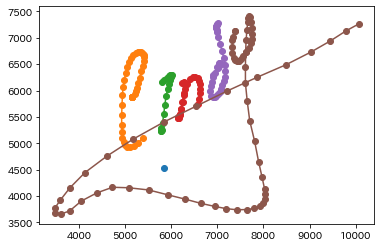

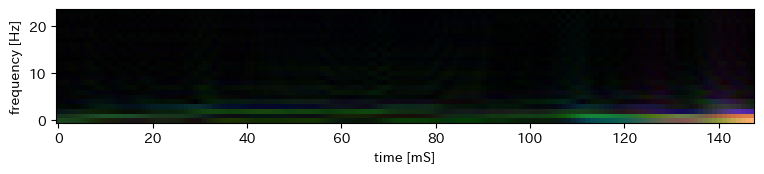

In [ ]:
index = 1520
print("データ長:", X_length[index])
print("窓のサイズ:", n_window)
plot_character(X[index])
plot_spectrogram(X_freqs[index], figsize=(50, 1.5), dpi=100)

In [ ]:
X_freqs = pad_sequences(X_freqs, padding='post', value=0)
X_freqs = (X_freqs - X_freqs.min())/(X_freqs.max()-X_freqs.min())

img_rows, img_cols, img_channels = X_freqs.shape[1:]

from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_freqs = X_freqs.reshape(X_freqs.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

In [74]:
import gc
from tensorflow.keras import backend
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # print(gc.collect()) # if it's done something you should see a number being outputted
    gc.collect()

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

In [75]:
from sklearn.metrics import roc_curve

In [76]:
def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

In [78]:
input_shape = X_freqs.shape[1:]

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Masking
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
import tensorflow as tf

def build_model(input_shape):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                  activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                # optimizer=Adadelta(),
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [79]:
batch_size=5
epochs=20

train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(1, num_user+1):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X_freqs[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=input_shape)
  model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  #reset_keras()
  #gc.collect()
  print()

user_index: 1
Epoch 1/20
7/7 [==============================] - 2s 67ms/step - loss: 0.5996 - accuracy: 0.6562 - val_loss: 0.3514 - val_accuracy: 0.8750
Epoch 2/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2190 - accuracy: 0.9062 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.0142e-04 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.3421e-06 - val_accuracy: 1.0000
Epoch

train EER(%): 0.0
test EER(%): 0.0

user_index: 4
Epoch 1/20
7/7 [==============================] - 1s 42ms/step - loss: 0.7129 - accuracy: 0.3750 - val_loss: 0.6576 - val_accuracy: 0.8750
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.5692 - accuracy: 0.8438 - val_loss: 0.5553 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3882 - accuracy: 0.9375 - val_loss: 0.6002 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2853 - accuracy: 0.8750 - val_loss: 0.5861 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2083 - accuracy: 0.8750 - val_loss: 0.4020 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2155 - accuracy: 0.8750 - val_loss: 0.5823 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.1064 - accuracy: 0.9688 - val_loss: 0.9739 

In [80]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 0.0
Average Test EER(%): 6.25
